Final Report
1. Prepare a Hamiltonian system. (Any system is OK. If you have no idea, I recommend a mass-spring system.)

    1-1. Integrate the system analytically and obtain an analytical solution.

    1-2. Integrate the system numerically with a fixed step size and obtain a numerical solution.
    
        1-2-1. using the forward Euler method

        1-2-2. using a higher-order Runge-Kutta method
        
        1-2-3. using a symplectic integrator
    
    1-3. Discuss the differences between the analytic solution and the numerical solutions that you obtain using the numerical integrators listed above. In particular, you may find some differences in behaviors of state and energy. 1-2 sentences per integrator are enough.

2. Prepare a differential system that exhibits a stable equilibrium and a bifurcation that destabilizes the equilibrium. (Any system is OK. If you have no idea, I recommend the van der Pol oscillator. Note that a frictional pendulum does not exhibit a bifurcation.) 
    
    2-1. Show the stability around an equilibrium point analytically by the linearization and identify the bifurcation point.
    
    2-2. Integrate the system numerically with a fixed same step size before and after the bifurcation.
    
        2-2-1. using the forward Euler method
    
        2-2-2. using an integrator other than the forward Euler method, such as a higher-order Runge-Kutta method.
    
    2-3. Discuss the differences between the stability of the analytical solution and those of the numerical solutions that you obtain using the numerical integrators listed above. The same equilibrium point may show different behaviors with different integrators. I expect to show such a phenomenon.

Note: A bifurcation variable is a variable whose value can be adjusted to induce a bifurcation. It is, for example, the current for the van der Pol oscillator. A bifurcation point is a value of the bifurcation variable at which a bifurcation occurs.

Submit your report as a pdf file on CLE by Aug. 13.

I expect a numerical solution to be provided as a figure, not a list of numbers. An analytical solution is given as an equation, but also as a figure to compare it with numerical solutions. You can use any programming languages and libraries, and do not have to attach your source codes to the report.

# Nonlinear System Theory

29C23002 Kentaro Ishikawa

In [1]:
using Plots
using LaTeXStrings

## 1.

I consider LC circuits as an example of a Hamiltonian system.

The Hamiltonian $H$ is represented as follows:

$$
H(q,i) = \frac{1}{2C} q^2 + \frac{1}{2L} i^2
$$

where $q$ is the charge of the capacitor (C),
$i$ is the current of the inductor (A),
$C$ is the capacitance of the capacitor (F),
and $L$ is the inductance of the inductor (H).

### 1-1.

The Hamiltonian System is represented as follows:

$$
\begin{align*}
\dot{q} & = \frac{i}{L}, \\
\dot{i} & = - \frac{q}{C}.
\end{align*}
$$

From these two equations, $i$ can be eliminated.

$$
\begin{align*}
\ddot{q} & = \frac{\dot{i}}{L} \\
\ddot{q} & = - \frac{q}{LC} \\
q & = A \cos\left(\frac{t}{\sqrt{LC}} + \phi\right)
\end{align*}
$$

where $A$ is the amplitude and $\phi$ is the phase of the simple harmonic motion.

I assume the initial condition $q(0) = 1$ and $\dot{q}(0) = 0$.

$q(0) = 1$ implies $A = 1 / \cos(\phi)$ and $\dot{q}(0) = 0$ implies $\phi = 0 \text{ or } \pi$.
$\phi = 0$ because $q(0) > 0$.
Thus, we get the following equation:

$$
q(t) = \cos\left( \frac{t}{\sqrt{LC}} \right)
$$

Substitute this $q$ into the Hamiltonian system equation.

$$
i(t) = -\sqrt{LC} \sin \left( \frac{t}{\sqrt{LC}} \right)
$$

I assume the parameter values as follows in all simulations:

| variable | value |
| --- | --- |
| $C$ | $1$ F |
| $L$ | $1$ H |
| $q(0)$ | $1$ C |
| $i(0)$ | $0$ A |
| $\Delta t$ | $0.1$ s|
| simulation time $T$ | $50$ s|

In [9]:
C = 1.0
L = 1.0
Δt = 0.1
T = 50.0
N = Int(T/Δt) # Number of steps
t = 0:Δt:(T-Δt) # Time array for plotting
print()

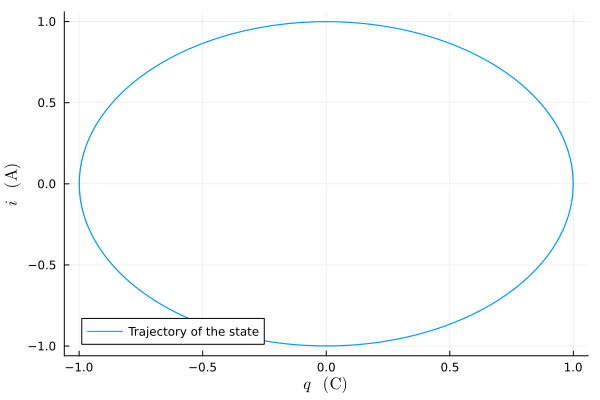

In [10]:
q = cos.(t ./ sqrt(L*C))
i = -sqrt(L*C) * sin.(t ./ sqrt(L*C))

plot(q, i,
    xlabel=L"q \quad (\mathrm{C})",
    ylabel=L"i \quad (\mathrm{A})",
    label="Trajectory of the state")

### 1-2.

#### 1-2-1.

The update formula for the forward Euler method is as follows:

$$
\begin{align*}
q_{k+1} = q_k + \frac{i_k}{L} \cdot \Delta t, \\
i_{k+1} = i_k - \frac{q_k}{C} \cdot \Delta t.
\end{align*}
$$

where $t_k = t_{k-1} + \Delta t, ~~ t_0 = t(0)$, $q_k := q(t_k)$ and $i_k := i(t_k)$.

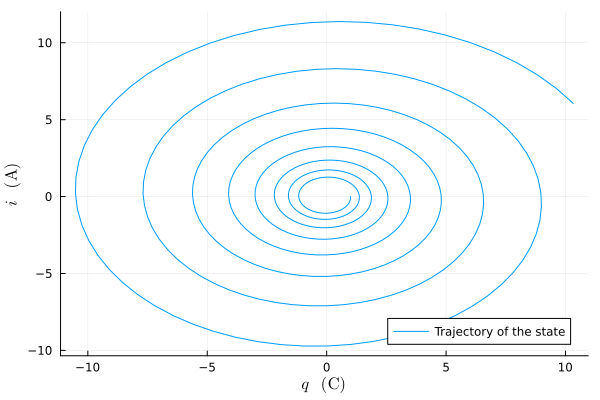

In [11]:
q = ones(N)
i = zeros(N)

for k in 1:(N-1)
    q[k+1] = q[k] + i[k] / L * Δt
    i[k+1] = i[k] - q[k] / C * Δt
end

plot(q, i,
    xlabel=L"q \quad (\mathrm{C})",
    ylabel=L"i \quad (\mathrm{A})",
    label="Trajectory of the state")

#### 1-2-2.

The functions $f$ and $g$ are defined as follows:

$$
\begin{align*}
f (i) & := \frac{i}{L}, & \quad
g (q) & := - \frac{q}{C}
\end{align*}
$$

$$
\begin{align*}
q_{k_1} & = f \left( i_k \right) = \frac{i_k}{L}, & \quad
i_{k_1} & = g \left( q_k\right) = - \frac{q_k}{C}, \\
q_{k_2} & = f \left( i_k + i_{k_1} \cdot \frac{\Delta t}{2} \right), & \quad
i_{k_2} & = g \left( q_k + q_{k_1} \cdot \frac{\Delta t}{2} \right), \\
q_{k_3} & = f \left( i_k + i_{k_2} \cdot \frac{\Delta t}{2} \right), & \quad
i_{k_3} & = g \left( q_k + q_{k_2} \cdot \frac{\Delta t}{2} \right), \\
q_{k_4} & = f \left( i_k + i_{k_3} \cdot \Delta t \right), & \quad
i_{k_4} & = g \left( q_k + q_{k_3} \cdot \Delta t \right).
\end{align*}
$$

The update formula for the 4th-order Runge-Kutta method is as follows:

$$
\begin{align*}
q_{k+1} & = q_k + \frac{\Delta t}{6} \left( q_{k_1} + 2 q_{k_2} + 2 q_{k_3} + q_{k_4} \right) \\
i_{k+1} & = i_k + \frac{\Delta t}{6} \left( i_{k_1} + 2 i_{k_2} + 2 i_{k_3} + i_{k_4} \right) \\
\end{align*}
$$

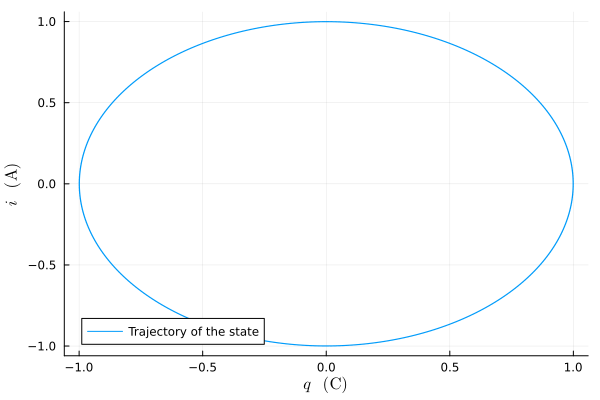

In [12]:
q = ones(N)
i = zeros(N)

f(i, L) = i / L
g(q, C) = -q / C

for k in 1:(N-1)
    qₖ₁ = f(i[k], L)
    iₖ₁ = g(q[k], C)

    qₖ₂ = f(i[k] + iₖ₁ * Δt/2, L)
    iₖ₂ = g(q[k] + qₖ₁ * Δt/2, C)

    qₖ₃ = f(i[k] + iₖ₂ * Δt/2, L)
    iₖ₃ = g(q[k] + qₖ₂ * Δt/2, C)

    qₖ₄ = f(i[k] + iₖ₃ * Δt, L)
    iₖ₄ = g(q[k] + qₖ₃ * Δt, C)

    q[k+1] = q[k] + Δt/6 * (qₖ₁ + 2*qₖ₂ + 2*qₖ₃ + qₖ₄)
    i[k+1] = i[k] + Δt/6 * (iₖ₁ + 2*iₖ₂ + 2*iₖ₃ + iₖ₄)
end

plot(q, i,
    xlabel=L"q \quad (\mathrm{C})",
    ylabel=L"i \quad (\mathrm{A})",
    label="Trajectory of the state")

#### 1-2-3.

The update formula using a symplectic integrator is as follows:

$$
\begin{align*}
i_{k + \frac{1}{2}} & = i_k - \frac{q_k}{C} \cdot \frac{\Delta t}{2}, \\
q_{k+1} & = q_k + \frac{i_{k + \frac{1}{2}}}{L} \cdot \Delta t, \\
i_{k+1} & = i_{k + \frac{1}{2}} - \frac{q_{k+1}}{C} \cdot \frac{\Delta t}{2}.
\end{align*}
$$

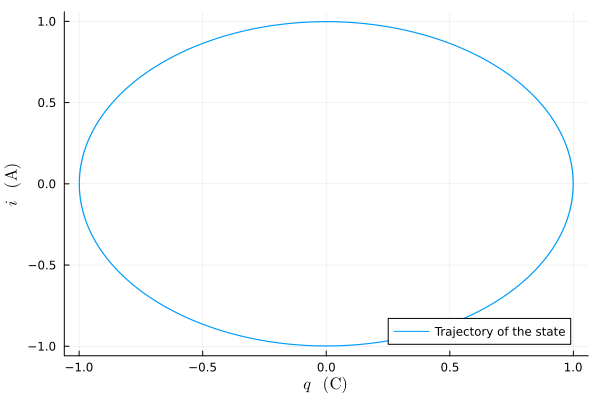

In [13]:
q = ones(N)
i = zeros(N)

for k in 1:(N-1)
    î = i[k] - 0.5 * Δt * q[k] / C # i_{k+1/2}
    q[k+1] = q[k] + Δt * î / L
    i[k+1] = î - 0.5 * Δt * q[k+1] / C
end

plot(q, i,
    xlabel=L"q \quad (\mathrm{C})",
    ylabel=L"i \quad (\mathrm{A})",
    label="Trajectory of the state")

### 1-3.

#### forward Euler method

With the solution obtained using the Euler method,
an increase in the amplitude of the simple harmonic motion was observed over time.

#### 4th-order Runge-Kutta method

Under the experimental conditions presented,
no clear violation of energy conservation was observed using the 4th-order Runge-Kutta method.
However, theoretically, over a very long simulation time, this method might show minor energy drifts or variations.

#### symplectic integrator

The symplectic integrator shows excellent energy conservation tailored for Hamiltonian systems.
In this experiment, its performance was on par with the 4th-order Runge-Kutta method,
but, theoretically, it's designed to maintain accuracy over longer simulations.

## 2.

I consider unforced Duffing Oscillator, that models a mechanical system where a mass is attached to a nonlinear spring and damper.

$$
\ddot{x} - \delta \dot{x} - \alpha x + \beta x^3 = 0
$$

where $x(t)$ is the displacement at time $t$,
$\delta > 0$ represents the damping coefficient,
$\alpha > 0$ is a linear stiffness coefficient determining the system's response to linear displacements,
$\beta > 0$ is a nonlinear stiffness coefficient influencing the system's response to cubed displacements.

### 2-1.

An equilibrium point is derived by solving the equation ignoring nonlinear term.

$x = 0$ is an equilibrium point, because $x = 0$ holds the equation $\ddot{x} + \delta \dot{x} + \alpha x = 0$.

Let $v := \dot{x}$.
System can be rewritten as:

$$
\begin{align*}
\dot{x} & = v \\
\dot{v} & = \delta v + \alpha x - \beta x^3
\end{align*}
$$

Jacobian at the origin ($x = 0$) $J$ is derived as follows:

$$
J = \begin{bmatrix}
    0 & 1 \\
    \alpha & \delta
\end{bmatrix}
$$

The eigenvalues of $J$ are:

$$
- \frac{1}{2} \left( \delta \pm \sqrt{-4\alpha + \delta^2} \right)
$$

The eigenvalues are 0 if $\delta = \pm 2 \sqrt{\alpha}$ holds.

Therefore, the bifurcation point is $\delta = \pm 2 \sqrt{\alpha}$. 

### 2-2.

Let $\alpha_1 = 2.5, \beta_1 = 1, \delta_1 = 0.2$  that holds $\delta^2 < 4 \alpha$ (case 1), and let $\alpha_2 = 1, \beta_2 = 1, \delta_2 = 2.5$ that holds $\delta^2 > 4 \alpha$ (Case 2).

In addition, I assume the parameter values as follows in both simulations:

| variable | value |
| --- | --- |
| $x(0)$ | $1$ m |
| $\dot{x}(0)$ | $0$ m/s |
| $\Delta t$ | $0.1$ s|
| simulation time $T$ | $50$ s|

In [194]:
α₁ = 2.5
β₁ = 1.0
δ₁ = 0.1
params₁ = [α₁, β₁, δ₁]

α₂ = 1.0
β₂ = 1.0
δ₂ = 2.5
params₂ = [α₂, β₂, δ₂]

x₀ = 0.3
v₀ = 0.0
Δt = 0.1
T = 50.0
N = Int(T/Δt)
t = 0:Δt:(T-Δt)

print()

#### 2-2-1.

The update formula for the forward Euler method is as follows:

$$
\begin{align*}
x_{k+1} & = x_k + v_k \cdot \Delta t \\
v_{k+1} & = v_k + \left( \delta v_k + \alpha x_k + \beta x_k^3 \right) \cdot \Delta t
\end{align*}
$$

where $t_k = t_{k-1} + \Delta t, ~~ t_0 = t(0)$, $x_k := x(t_k)$ and $v_k := \dot{x}(t_k)$.

In [195]:
function duffing(states, params)
    x, v = states
    α, β, δ = params
    return [v, -δ*v - α*x + β*x^3]
end

function euler(x₀, v₀, Δt, N, params)
    x = [x₀]; v = [v₀]

    for k in 1:N-1
        xₖ, vₖ = x[end], v[end]
        dx, dv = duffing([xₖ, vₖ], params)

        push!(x, xₖ + Δt * dx)
        push!(v, vₖ + Δt * dv)
    end
    
    return x, v
end

euler (generic function with 1 method)

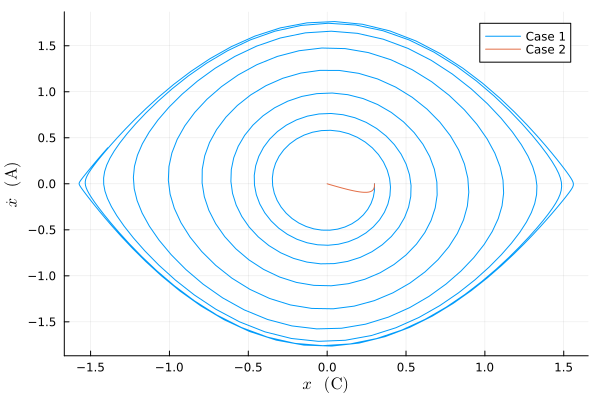

In [196]:
x₁, v₁ = euler(x₀, v₀, Δt, N, params₁)
x₂, v₂ = euler(x₀, v₀, Δt, N, params₂)

plot(x₁, v₁,
    xlabel=L"x \quad (\mathrm{C})",
    ylabel=L"\dot{x} \quad (\mathrm{A})",
    label="Case 1")
plot!(x₂, v₂,
    label="Case 2")

#### 2-2-2.

For our Duffing oscillator system, the function $g$ is defined as:

$$
g(x, v) := - \delta v - \alpha x + \beta x^3.
$$

Using this definition, the intermediate steps $x_{k_i}$ and $v_{k_i}$ are given by:

$$
\begin{align*}
x_{k_1} & = v_k, & \quad v_{k_1} & = g(x_k, v_k), \\
x_{k_2} & = v_k + \frac{1}{2} v_{k_1}, & \quad v_{k_2} & = g \left( x_k + \frac{1}{2} x_{k_1}, v_k + \frac{1}{2} v_{k_1} \right), \\
x_{k_3} & = v_k + \frac{1}{2} v_{k_2}, & \quad v_{k_3} & = g \left( x_k + \frac{1}{2} x_{k_2}, v_k + \frac{1}{2} v_{k_2} \right), \\
x_{k_4} & = v_k + v_{k_3}, & \quad v_{k_4} & = g \left( x_k + x_{k_3}, v_k + v_{k_3} \right).
\end{align*}
$$

The update formula for the 4th-order Runge-Kutta method for our system is:

$$
\begin{align*}
x_{k+1} & = x_k + \frac{\Delta t}{6} \left( x_{k_1} + 2 x_{k_2} + 2 x_{k_3} + x_{k_4} \right) \\
        & = x_{k+1} = x_k + \frac{\Delta t}{6} \left( 6 v_k + 2 v_{k_1} + 2 v_{k_2} + v_{k_3} \right), \\
v_{k+1} & = v_k + \frac{\Delta t}{6} \left( v_{k_1} + 2 v_{k_2} + 2 v_{k_3} + v_{k_4} \right).
\end{align*}
$$

In [204]:
function g(x, v, params)
    α, β, δ = params
    return -δ*v - α*x + β*x^3
end

function rk4(x₀, v₀, Δt, N, params)
    x = [x₀]; v = [v₀]

    for k in 1:N-1
        xₖ, vₖ = x[end], v[end]

        xₖ₁ = vₖ
        vₖ₁ = g(xₖ, vₖ, params)

        xₖ₂ = vₖ + 0.5 * Δt * xₖ₁
        vₖ₂ = g(xₖ + 0.5 * Δt * xₖ₁, vₖ + 0.5 * Δt * vₖ₁, params)

        xₖ₃ = vₖ + 0.5 * Δt * xₖ₂
        vₖ₃ = g(xₖ + 0.5 * Δt * xₖ₂, vₖ + 0.5 * Δt * vₖ₂, params)

        xₖ₄ = vₖ + Δt * xₖ₃
        vₖ₄ = g(xₖ + Δt * xₖ₃, vₖ + Δt * vₖ₃, params)

        xₖ₊₁ = xₖ + Δt/6 * (xₖ₁ + 2*xₖ₂ + 2*xₖ₃ + xₖ₄)
        vₖ₊₁ = vₖ + Δt/6 * (vₖ₁ + 2*vₖ₂ + 2*vₖ₃ + vₖ₄)
        
        push!(x, xₖ₊₁); push!(v, vₖ₊₁)
    end
    
    return x, v
end

rk4 (generic function with 1 method)

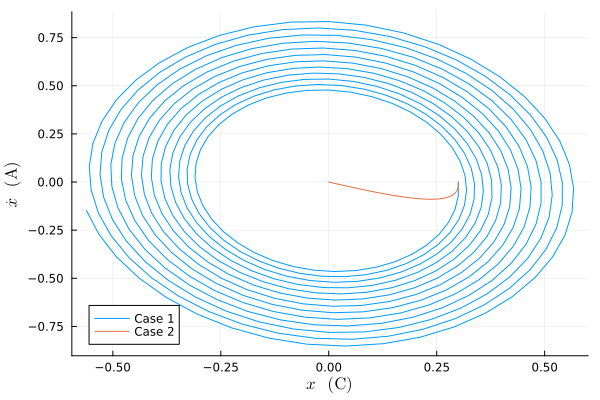

In [205]:
x₁, v₁ = rk4(x₀, v₀, Δt, N, params₁)
x₂, v₂ = rk4(x₀, v₀, Δt, N, params₂)

plot(x₁, v₁,
    xlabel=L"x \quad (\mathrm{C})",
    ylabel=L"\dot{x} \quad (\mathrm{A})",
    label="Case 1")
plot!(x₂, v₂,
    label="Case 2")

### 2-3.

In Case 2 ($\delta^2 > 4 \alpha$ holds), both the Euler method and the 4th-order Runge Kutta method showed the state converging to the origin along almost identical trajectories.
These align with the analytically derived result.

In Case 1 ($\delta^2 < 4 \alpha$ holds), the result from the Euler method settled into a periodic equilibrium,
on the other hand, the result from the 4th-order Runge Kutta method diverged.
Since the system is not expected to reach equilibrium analytically,
the result from the 4th-order Runge Kutta method is correct.
The discrepancy in the Euler method's result can be attributed to the errors.